In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lim_precision(my_array):
    limprec_array = []
    for val in my_array:
        limprec_array = np.append(limprec_array, "{:.2f}".format(val))
    return limprec_array

In [11]:
# wfile = np.loadtxt("19950126.R1")
# wfile = np.loadtxt("19941117.R2")
wfile = np.loadtxt("20210517.R2")
print (wfile.shape)

flow=1.075
fhigh=13.825
freq = np.linspace(flow, fhigh, 256)
#Last one is the background c.f. https://solar-radio.gsfc.nasa.gov/wind/one_minute_doc.html
bg_spectrum = wfile[:,1440] 

(256, 1441)


Text(0, 0.5, 'Freq (MHz)')

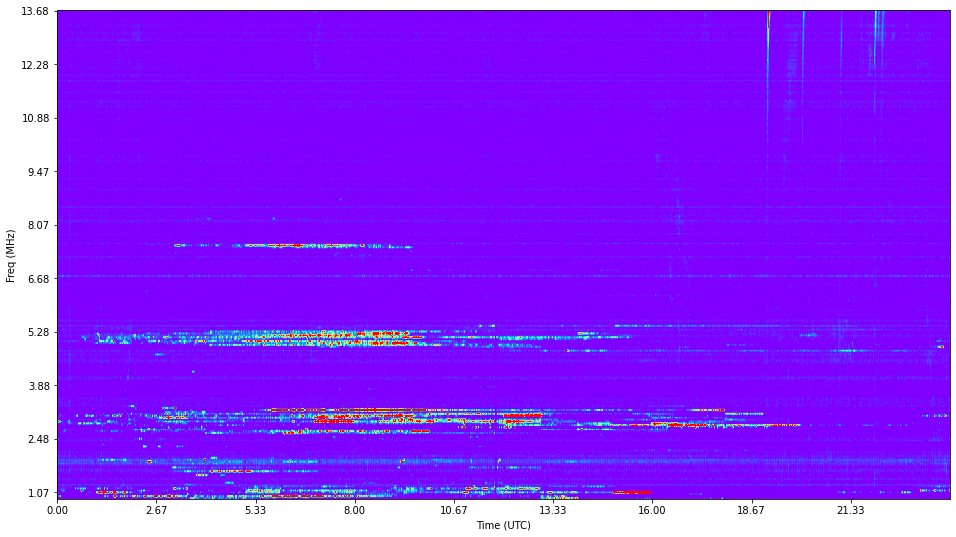

In [12]:
min_x = 0
max_x = 1440


bline_sub_wfile = (wfile[:, min_x:max_x].T-wfile[:, min_x].T).T #wfile[:, min_x].T

plt.figure(figsize=(16,9))
plt.imshow(bline_sub_wfile, aspect='auto', vmin=np.min(bg_spectrum)/4, vmax=np.max(bg_spectrum)*4, cmap='rainbow')

no_labels = 10 # how many labels to see on ayis y

ny = len(freq)
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y)[::-1] # piyel count at label position
y_labels = lim_precision(freq[::step_y]) # labels you want to see
plt.yticks(y_positions, y_labels)

time_s = np.linspace(0,24,wfile.shape[1])[min_x:max_x]
nx = len(time_s)
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = lim_precision(time_s[::step_x]) # labels xou want to see
plt.xticks(x_positions, x_labels)

plt.xlabel("Time (UTC)")
plt.ylabel("Freq (MHz)")
